11490434/11490434 [==============================] - 0s 0us/step


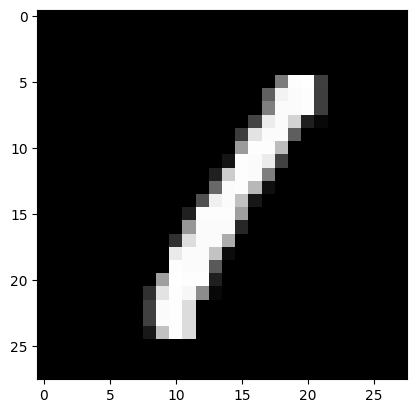

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[3], cmap='gray')
plt.show()
print(x_train[3])

In [3]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # use 32-bit precision when training a neural network, so at one point the training data will have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float immediately.
x_test = x_test.astype('float32')
x_train /= 255  # Each image has Intensity from 0 to 255
x_test /= 255
num_classes = int(10)
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax')) 
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(),
              metrics=['accuracy'])

batch_size = 128
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 5ms/step - loss: 0.2526 - accuracy: 0.9231 - val_loss: 0.1016 - val_accuracy: 0.9683
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1042 - accuracy: 0.9681 - val_loss: 0.0840 - val_accuracy: 0.9733
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0759 - accuracy: 0.9769 - val_loss: 0.0696 - val_accuracy: 0.9777
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0589 - accuracy: 0.9814 - val_loss: 0.0676 - val_accuracy: 0.9797
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0625 - val_accuracy: 0.9820
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0603 - val_accuracy: 0.9827
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0693 - val_accuracy: 0.9810
Epoch 

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08250973373651505
Test accuracy: 0.983299970626831
